In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('test.jpg',0)

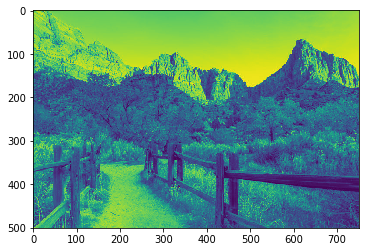

In [3]:
plt.imshow(img)

In [12]:
c = [[1,1,1],[1,1,1],[1,1,1]]


# Zero Padding

In [13]:
zimg = np.zeros((len(img)+2,len(img[0])+2),dtype = np.uint8)

In [14]:
zimg[1:len(img)+1,1:len(img[0])+1] = img

In [15]:
img.shape

(501, 750)

In [16]:
zimg.shape

(503, 752)

In [17]:
zimg

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 185, 187, ..., 213, 213,   0],
       [  0, 189, 196, ..., 214, 214,   0],
       ...,
       [  0, 105, 129, ...,  41,  38,   0],
       [  0, 170, 193, ...,  55,  69,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [18]:
cimg = img.copy()
for i in range(1,img.shape[0]+1):
    for j in range(1,img.shape[1]+1):
        s = 0
        s += zimg[i-1][j-1] * c[0][0]
        s += zimg[i-1][j] * c[0][1]
        s += zimg[i-1][j+1] * c[0][2]
        s += zimg[i][j-1] * c[1][0]
        s += zimg[i][j] * c[1][1] 
        s += zimg[i][j+1] * c[1][2]
        s += zimg[i+1][j-1] * c[2][0]
        s += zimg[i+1][j] * c[2][1]
        s += zimg[i+1][j+1] * c[2][2]
        s = s//9
        cimg[i-1][j-1] = s

In [19]:
cv2.imshow('Zero',cimg)
cv2.imshow('Original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Mirroring


In [20]:
mimg = np.zeros((len(img)+2,len(img[0])+2),dtype = np.uint8)
mimg[1:len(img)+1,1:len(img[0])+1] = img

In [21]:
sh = img.shape

In [22]:
mimg[0][0] = img[0][0]
mimg[sh[0]+1][sh[1]+1] = img[sh[0]-1][sh[1]-1]
mimg[sh[0]+1][0] = img[sh[0]-1][0]
mimg[0][len(img)+1] = img[0][len(img)-1]
mimg[0][sh[1]+1] = img[0][sh[1]-1]
mimg[0,1:sh[1]+1] = img[0,:]
mimg[sh[0]+1,1:sh[1]+1] = img[sh[0]-1,:]
mimg[1:sh[0]+1,0]  = img[:,0]
mimg[1:sh[0]+1,sh[1]+1] = img[:,sh[1]-1]

In [15]:
mimg

array([[185, 185, 187, ..., 213, 213, 213],
       [185, 185, 187, ..., 213, 213, 213],
       [189, 189, 196, ..., 214, 214, 214],
       ...,
       [105, 105, 129, ...,  41,  38,  38],
       [170, 170, 193, ...,  55,  69,  69],
       [170, 170, 193, ...,  55,  69,  69]], dtype=uint8)

In [16]:
c1img = img.copy()
for i in range(1,img.shape[0]+1):
    for j in range(1,img.shape[1]+1):
        s = 0
        s += mimg[i-1][j-1] * c[0][0]
        s += mimg[i-1][j] * c[0][1]
        s += mimg[i-1][j+1] * c[0][2]
        s += mimg[i][j-1] * c[1][0]
        s += mimg[i][j] * c[1][1] 
        s += mimg[i][j+1] * c[1][2]
        s += mimg[i+1][j-1] * c[2][0]
        s += mimg[i+1][j] * c[2][1]
        s += mimg[i+1][j+1] * c[2][2]
        s = s//9
        c1img[i-1][j-1] = s
        

In [17]:
cv2.imshow('mirror',c1img)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Crop-off


In [34]:
crimg = np.zeros((len(img)-2,len(img[0])-2),dtype = np.uint8)

In [35]:

for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        s = 0
        s += img[i-1][j-1] * c[0][0]
        s += img[i-1][j] * c[0][1]
        s += img[i-1][j+1] * c[0][2]
        s += img[i][j-1] * c[1][0]
        s += img[i][j] * c[1][1] 
        s += img[i][j+1] * c[1][2]
        s += img[i+1][j-1] * c[2][0]
        s += img[i+1][j] * c[2][1]
        s += img[i+1][j+1] * c[2][2]
        s = s//9
        if(s>=0):
            crimg[i-1][j-1] = s
        else:
            crimg[i-1][j-1] = 0

In [36]:
cv2.imshow('croped',crimg)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
crimg.shape


(499, 748)

In [38]:
img.shape

(501, 750)